In [1]:
import pandas as pd
import numpy as np
import time
from src.peblMl import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix as CM2
from sklearn.metrics import classification_report

In [2]:
%%time
data_start=pd.read_pickle('data/wikiNews.pkl')
data_noise=data_start[data_start['topic'].isin([ 'европа', 'футбол', 'спорт', 'россия'])]
data_noise['topic']='other'
data_sport=data_start[data_start['topic'].isin(['политика'])]
data_space=data_start[data_start['topic'].isin(['астрономия'])]
data_test=data_noise
data_test=data_test.append(data_sport[80:])
data_test=data_test.append(data_space[25:])
data_train=data_sport[:80]
data_train=data_train.append(data_space[:25])
print ('Train Data: \n', data_train['topic'].value_counts())
print ('Test Data: \n', data_test['topic'].value_counts())

Train Data: 
 политика      80
астрономия    25
Name: topic, dtype: int64
Test Data: 
 other         595
политика      375
астрономия      9
Name: topic, dtype: int64
Wall time: 581 ms


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
%%time
modelML=peblMl()
modelML.fit(data_train['Noun'].tolist(), data_train['topic'].tolist())
vectorizer = TfidfVectorizer(min_df=1)
clf = LogisticRegression(C=535, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
vectorizer_model = vectorizer.fit(data_train['Noun'].tolist())
vectors = vectorizer.transform(data_train['Noun'].tolist())
clf.fit(vectors, data_train['topic'].tolist())

topicValueResult=pd.DataFrame(columns=['topicName', 'probValue', 'realTopic', 'className'])
goodT=0
wrongT=0
i=0
for testRow in data_test['Noun'].tolist():
    result=modelML.predict(testRow, 'other')[:1]
    topicValueResult=topicValueResult.append({'topicName': result.index[0], 'probValue': result.values[0], 
                                             'realTopic': data_test['topic'][i], 'className': clf.predict(vectorizer.transform([testRow]))[0].tolist()}, ignore_index=True)
    if result.index[0]!='other' and data_test['topic'][i]!='other':
        #print (result.index[0], result.values[0], data_test['topic'][i])
        goodT+=1
    if data_test['topic'][i]!='other' and result.index[0]=='other':
        wrongT+=1
    i+=1



E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Wall time: 5.4 s


Real Value: 
 other         595
политика      375
астрономия      9
Name: realTopic, dtype: int64
Classification Value: 
 политика      959
астрономия     20
Name: className, dtype: int64
Topic Model Value: 
 other         575
политика      396
астрономия      8
Name: topicName, dtype: int64


E:\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing
E:\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
E:\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
E:\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:302: RuntimeWarning: invalid value encountered in true_divide
  * (self.TN + self.FP) * (self.TN + self.FN)))
E:\Anaconda\lib\site-packages\pandas_ml\confusio

Class 
 OrderedDict([('cm', Predicted   other  астрономия  политика  __all__
Actual                                          
other           0          11       584      595
астрономия      0           9         0        9
политика        0           0       375      375
__all__         0          20       959      979), ('overall', OrderedDict([('Accuracy', 0.3922369765066394), ('95% CI', (0.36150538755873823, 0.4236187734518023)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.9999999999999999), ('Kappa', 0.02694625782612471), ("Mcnemar's Test P-Value", 'ToDo')])), ('class', Classes                                   other  астрономия   политика
Population                                  979         979        979
P: Condition positive                       595           9        375
N: Condition negative                       384         970        604
Test outcome positive                         0          20        959
Test outcome negative                       979 

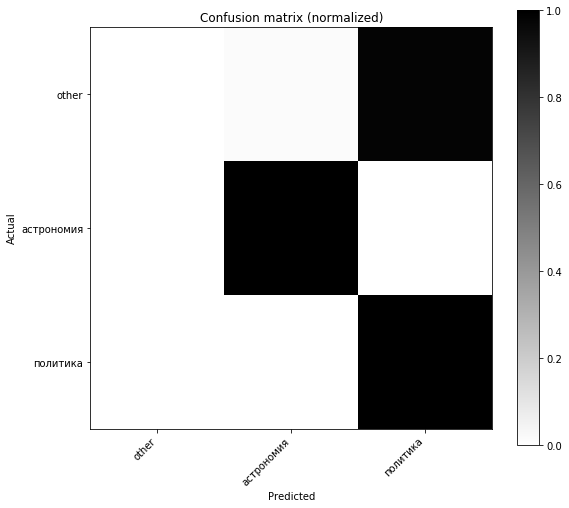

E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

      other       0.00      0.00      0.00       595
   политика       0.39      1.00      0.56       375
 астрономия       0.45      1.00      0.62         9

avg / total       0.15      0.39      0.22       979

Topic 
 OrderedDict([('cm', Predicted   other  астрономия  политика  __all__
Actual                                          
other         431           3       161      595
астрономия      4           5         0        9
политика      140           0       235      375
__all__       575           8       396      979), ('overall', OrderedDict([('Accuracy', 0.6853932584269663), ('95% CI', (0.6552692089768317, 0.7143974820575612)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 1.544217953307653e-10), ('Kappa', 0.35534822466990496), ("Mcnemar's Test P-Value", 'ToDo')])), ('class', Classes                                   other  астрономия  политика
Population                                  979         979    

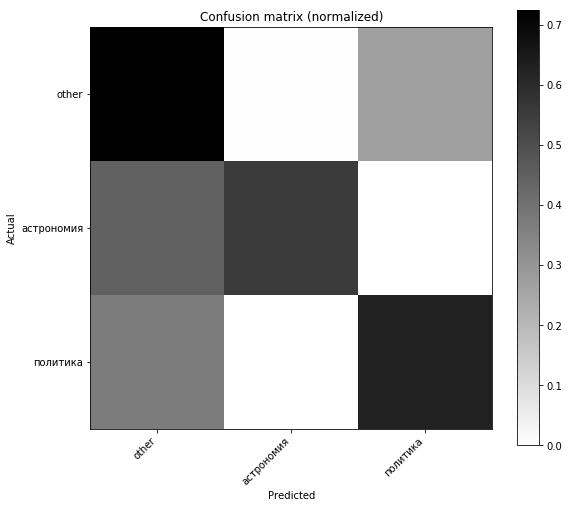

             precision    recall  f1-score   support

      other       0.75      0.72      0.74       595
   политика       0.59      0.63      0.61       375
 астрономия       0.62      0.56      0.59         9

avg / total       0.69      0.69      0.69       979



In [4]:
print ('Real Value: \n', topicValueResult['realTopic'].value_counts())
print ('Classification Value: \n', topicValueResult['className'].value_counts())
print ('Topic Model Value: \n', topicValueResult['topicName'].value_counts())


print ('Class \n', CM2(topicValueResult['realTopic'], topicValueResult['className']).stats())
CM2(topicValueResult['realTopic'], topicValueResult['className']).plot(normalized=True)
plt.show()
print(classification_report(topicValueResult['realTopic'], topicValueResult['className'], labels=['other', 'политика', 'астрономия']))

print ('Topic \n', CM2(topicValueResult['realTopic'], topicValueResult['topicName']).stats())
CM2(topicValueResult['realTopic'], topicValueResult['topicName']).plot(normalized=True)
plt.show()
print(classification_report(topicValueResult['realTopic'], topicValueResult['topicName'], labels=['other', 'политика', 'астрономия']))
